# House Price Prediction

House price prediction is a regression problem that can be solved by various machine learning models. The models that will be used for this are Linear Regression, Support Vector Regression, Lasso Regression, Decision Tree, Random Forest.

## Data Fields

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Importing packages

In [2]:
# EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno

# Machine Learning


## File Read

In [3]:
train_data = pd.read_csv("House_Prediction_train.csv")
test_data = pd.read_csv("House_Prediction_test.csv")
sample_submission = pd.read_csv("House_Prediction_sample_submission.csv")

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


## Exploratory Data Analysis (EDA)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Missing Values


Alley= 1369

PoolQC= 1453

Fence = 1179

MiscFeature = 1406

LotFrontage = 259

MasVnrType = 8

BsmtQual = 37

BsmtCond = 37

BsmtExposure = 38

BsmtFinType1 = 37

BsmtFinType2 = 38

FireplaceQu = 690

GarageYrBlt = 81

GarageFinish = 81

GarageQual = 81

GarageCond = 81

In [37]:
train_data.Electrical.isnull().sum()

1

In [28]:
train_data.isnull().iloc[0:25, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [25]:
train_data.notnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True
1,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True
2,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True
3,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True
4,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True
1456,True,True,True,True,True,True,False,True,True,True,...,True,False,True,False,True,True,True,True,True,True
1457,True,True,True,True,True,True,False,True,True,True,...,True,False,True,True,True,True,True,True,True,True
1458,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True


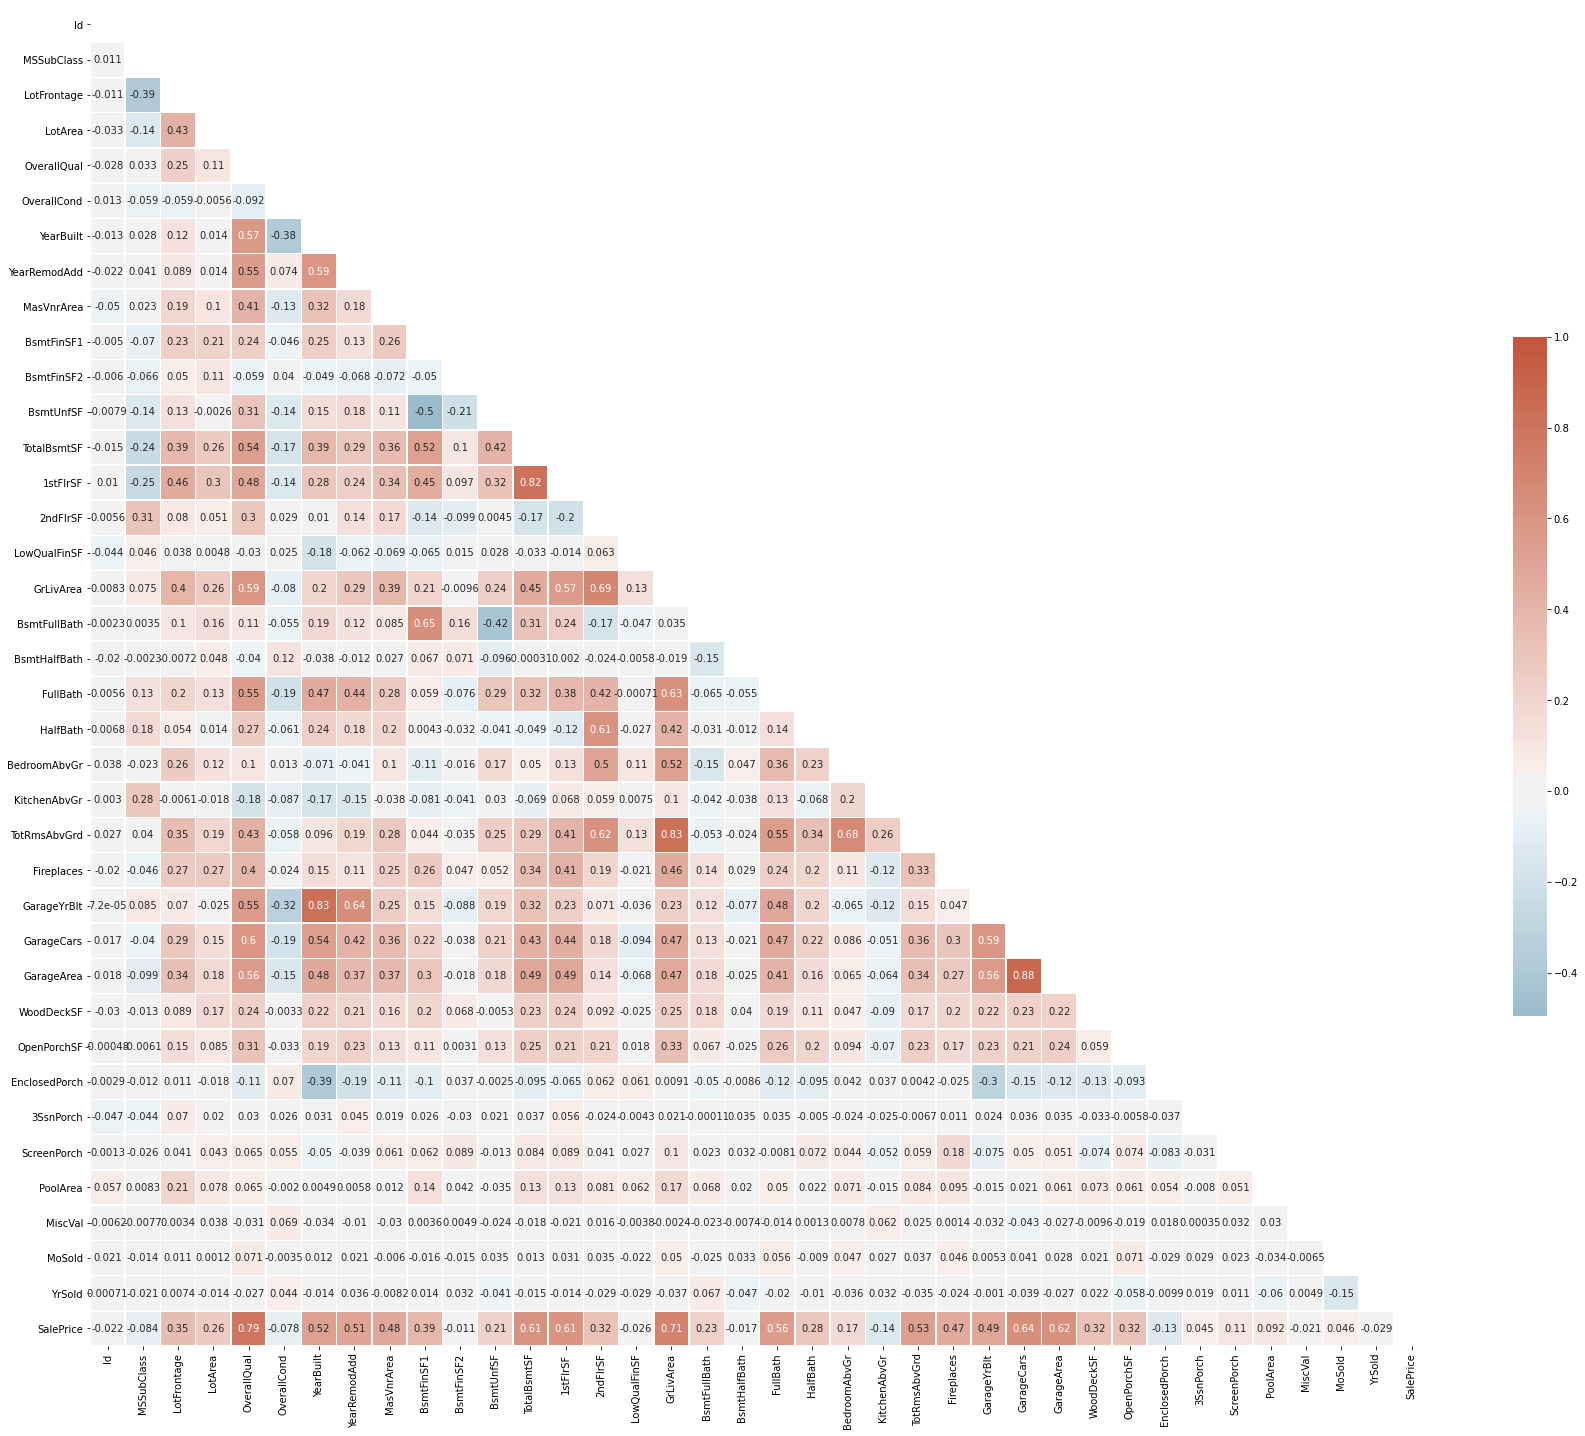

In [6]:
# Correlation Matrix/ Heatmap (Taken from https://www.kaggle.com/marto24/beginners-prediction-top3)

f, ax = plt.subplots(figsize=(30, 25))
mat = train_data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

According to the heatmap above, it shows the pearson value of each variable corresponding to another. In this case, we will only be looking at the last row which tells you which variables have a significant impact on SalePrice of a house. 

Overallqual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF (no use), FullBath, TotRmsAbovGrd, YearBuilt, YearRemodAdd, GarageYrBlt, BsmtFinType1, fireplaces

These variables haave been explored below

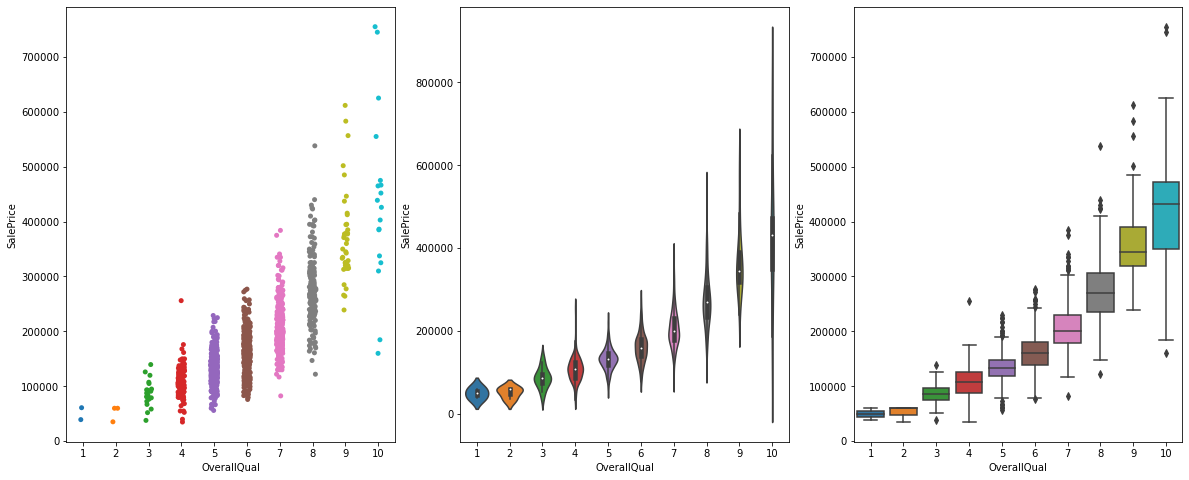

In [7]:
#OverallQual vs SalePrice 
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[1])
sns.boxplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[2])

plt.show()

Above shows the graphs corresponding to overall quality and sale price. According to it, as quality increases, the sale price increases. This shows that overall quality affects saleprice positively. Other than that, we can see that there are outliers in this graph, especially at overall quality 4, 7, 8, 9 and 10. 10 has the most outliers. These outliers must be investigated to make sure these values are of normal range. 

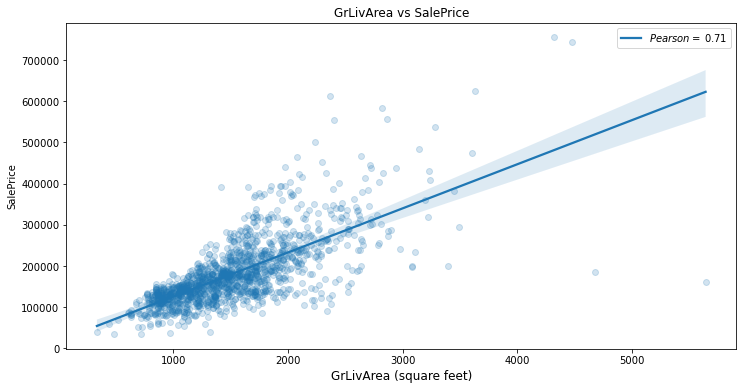

In [30]:
# GrLivArea vs SalePrice [corr = 0.71] (Above grade (ground) living area square feet)

Pearson_GrLiv = 0.71
plt.figure(figsize = (12,6))
sns.regplot(data=train_data, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.xlabel('GrLivArea (square feet)', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

Above shows a scatterplot corresponding to GrLivArea and sale price with a straight line indicating the pearson value (variable worth). According to it, as the living area in squarefeet for ground houses increases, the sale price increases. This shows that the living area in squarefeet for ground houses affects sale price positively. Other than that, we can see that there are outliers in this graph, especially from 2000 and above, these will be investigated before any data preprocessing will be done to it. 

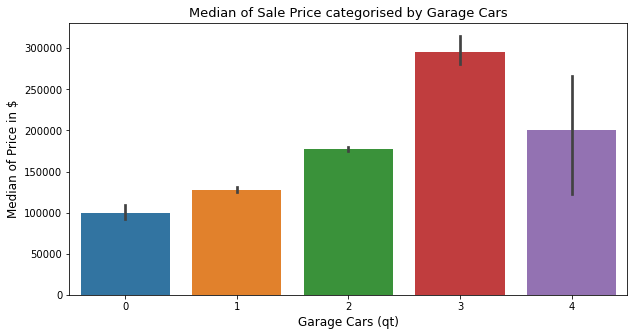

In [5]:
# Median of Sale Price categorised by Garage Cars

plt.figure(figsize = (10,5))
sns.barplot(x='GarageCars', y="SalePrice", data = train_data, estimator = np.median)
plt.title('Median of Sale Price categorised by Garage Cars', fontsize = 13)
plt.xlabel('Garage Cars (qt)', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

Above shows a barchart with x as Garage Cars measured in quantity and y as Median Sale Price. According to it, garage that can fit 3 cars are usually houses with high sale price. While the others like 0 and 1, 3 and 4 garage cars have sale prices that are nearly the same with each other. This shows an odd trend as I would predict that the sale price with 4 garage cars would be higher than 3. This could mean that having 4 garage cars in a house is less common.

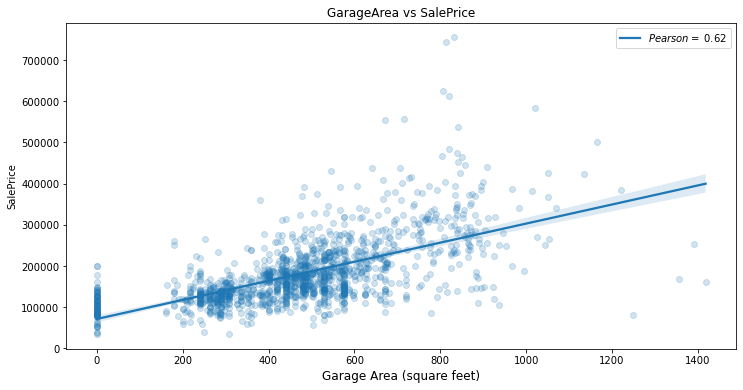

In [17]:
# GarageArea vs SalePrice [corr = 0.62] (Size of garage in square feet)

Pearson_GarageArea = 0.62
plt.figure(figsize = (12,6))
sns.regplot(data=train_data, x = 'GarageArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GarageArea vs SalePrice', fontsize = 12)
plt.xlabel('Garage Area (square feet)', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GarageArea)], loc = 'best')
plt.show() 

Above shows a scatterplot x as GarageArea and y as SalePrice. This graph shows the pearson (variable worth) value. This graph has a positive trend where as garage area increases, sale price increases. This shows that as the size of garage area has a positive impact towards SalePrice. Other than that, the graph shows outliers especially after 800.

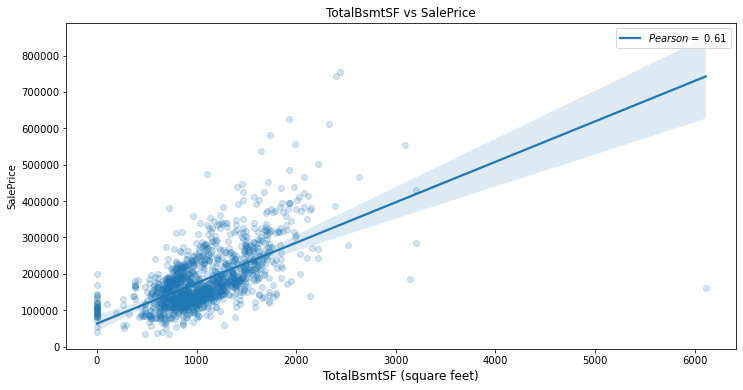

In [31]:
# TotalBsmtSF vs SalePrice [corr = 0.61] (Total square feet of basement area)

Pearson_TotalBsmtSF = 0.61
plt.figure(figsize = (12,6))
sns.regplot(data=train_data, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.xlabel('TotalBsmtSF (square feet)', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_TotalBsmtSF)], loc = 'best')
plt.show()

Above shows a scatterplot which has x as TotalBsmtSF and y as SalePrice. This graph shows the pearson (variable worth) value. This graph has a positive trend where as the total square feet of basement area increases, sale price increases. This shows that as the total square feet of basement area has a positive impact towards SalePrice. Other than that, the graph shows outliers especially after 1500.

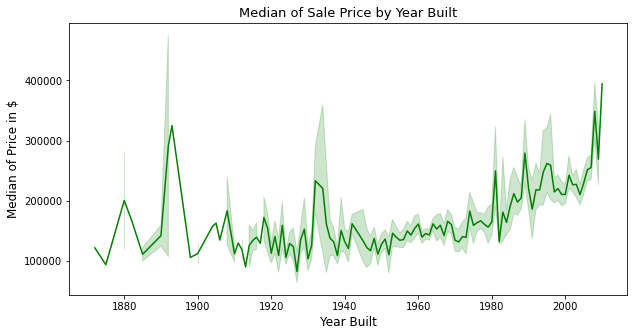

In [32]:
# Sale Price by Year Built

plt.figure(figsize = (10,5))
sns.lineplot(x='YearBuilt', y="SalePrice", data = train_data, color="Green")
plt.title('Median of Sale Price by Year Built', fontsize = 13)
plt.xlabel('Year Built', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

According to the line graph above, this shows that the sale price of a house varies between the year it has been built. As shown above, we can see that 1890 has a spike in sale price while the others only ranges less than 300000. As soon as times are closer to 1980, the sale price has begun to increase more than other years.

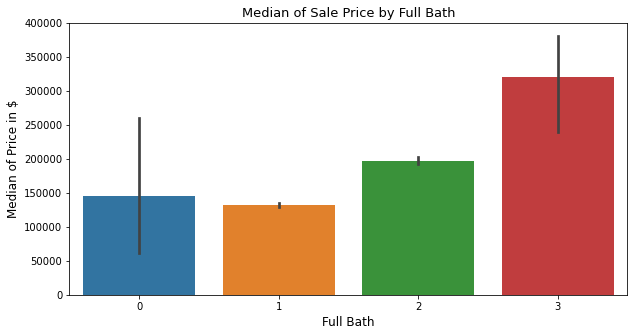

In [8]:
# Median of Sale Price by FullBath (Full bathrooms above grade)

plt.figure(figsize = (10,5))
sns.barplot(x='FullBath', y="SalePrice", data = train_data, estimator = np.median)
plt.title('Median of Sale Price by Full Bath', fontsize = 13)
plt.xlabel('Full Bath', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

According to the bar chart above, it shows the full bathrooms above grade vs the median of sale price. It shows that 1 full bathroom is less expensive compared to 0 full bathroom. Furthermore, we can see a big spike between having 2 to 3 full bathrooms.

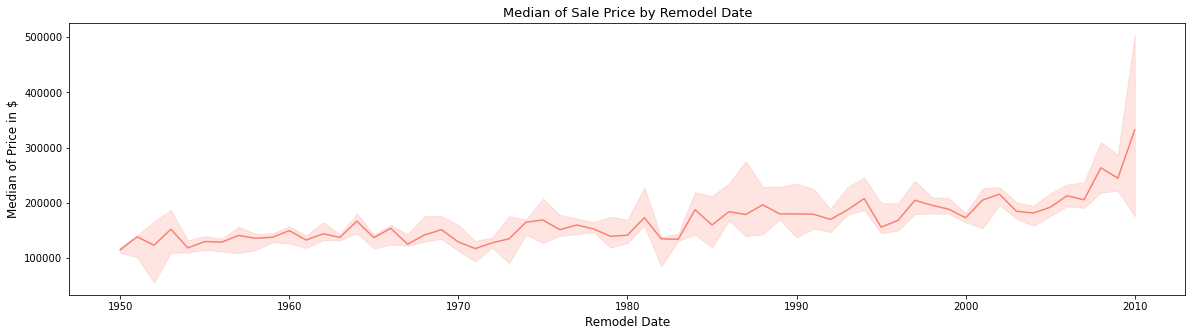

In [10]:
# Median of Sale Price by YearRemodAdd (Remodel date)

plt.figure(figsize = (20,5))
sns.lineplot(x='YearRemodAdd', y="SalePrice", data = train_data, estimator = np.median, color="salmon")
plt.title('Median of Sale Price by Remodel Date', fontsize = 13)
plt.xlabel('Remodel Date', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

According to the line graph above, it shows the Remodel date vs the median of sale price. It shows that the date of remodelling does affect sale price to some degree, although not much. The peak sale price for this is after 2005.

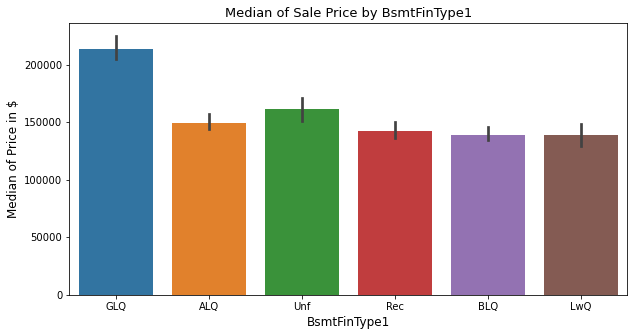

In [29]:
# Median of Sale Price categorised by BsmtFinType1 (Quality of basement finished area)

plt.figure(figsize = (10,5))
sns.barplot(x='BsmtFinType1', y="SalePrice", data = train_data, estimator = np.median)
plt.title('Median of Sale Price by BsmtFinType1', fontsize = 13)
plt.xlabel('BsmtFinType1', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show() 

According to the line graph above, it shows the quality of basement finished area vs the median of sale price. Based on the graph, GLQ has the most expensive sale price while the others around 150000.

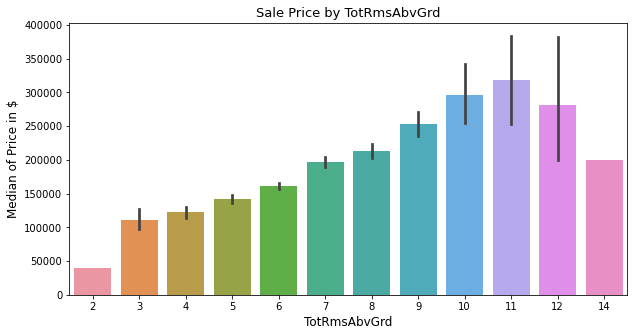

In [34]:
# Median of Sale Price by TotRmsAbvGrd (total rooms above grade)

plt.figure(figsize = (10,5))
sns.barplot(x='TotRmsAbvGrd', y="SalePrice", data = train_data)
plt.title('Sale Price by TotRmsAbvGrd', fontsize = 13)
plt.xlabel('TotRmsAbvGrd', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

According to the bar chart above,it shows the total rooms above grade vs the sale price. The sale price gradually increases as the total rooms above grade increases. This trend lasts up until it hits 11 total rooms above grade, 12 to 14 rooms sale price has gone down.

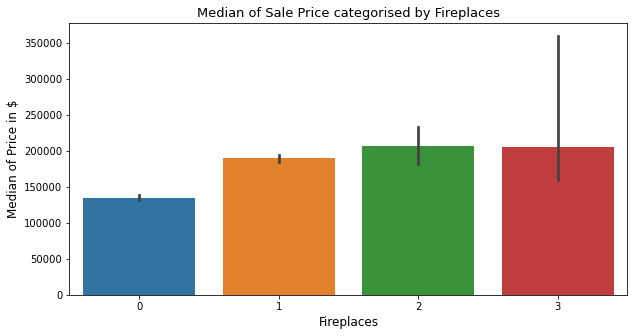

In [12]:
# Median of Sale Price categorised by Fireplaces

plt.figure(figsize = (10,5))
sns.barplot(x='Fireplaces', y="SalePrice", data = train_data, estimator = np.median)
plt.title('Median of Sale Price categorised by Fireplaces', fontsize = 13)
plt.xlabel('Fireplaces', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show() 

According to the bar chart above,it shows the fireplaces vs the median of sale price. The sale price gradually increases as the fireplaces increases. The amount of fireplace does not increase the sale price as much as other variables that have been shown. However, there is a small increase as the fireplace increases.

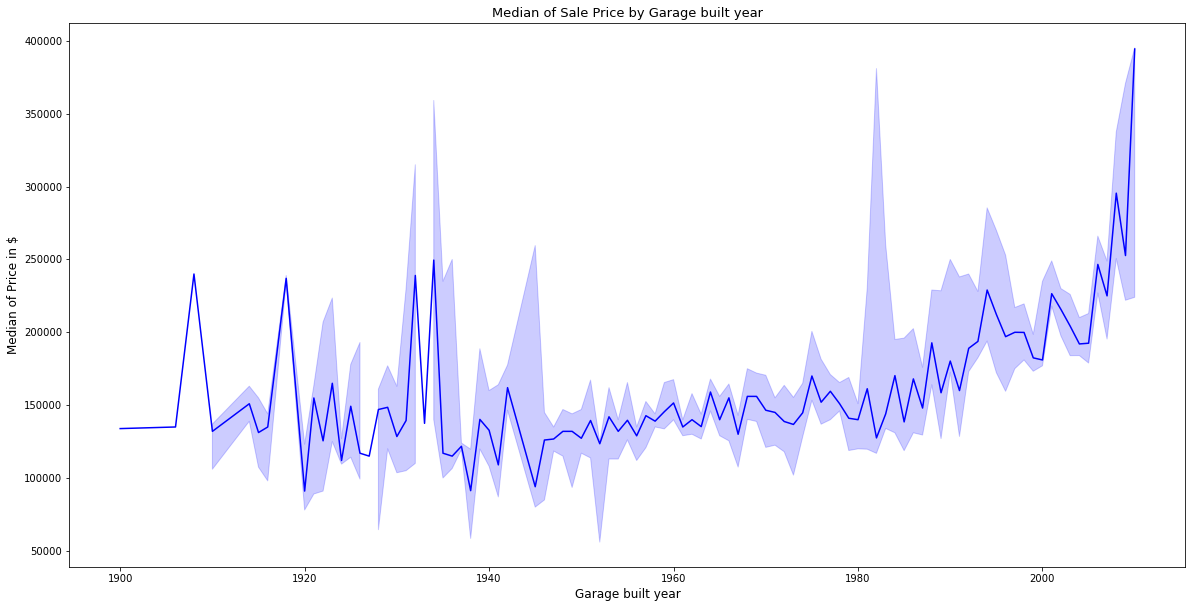

In [16]:
# Median of Sale Price by GarageYrBlt (Garage built year)

plt.figure(figsize = (20,10))
sns.lineplot(x='GarageYrBlt', y="SalePrice", data = train_data, estimator = np.median, color="blue")
plt.title('Median of Sale Price by Garage built year', fontsize = 13)
plt.xlabel('Garage built year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

According to the line chart above, it shows the Garage built year vs median of sale price. From the graph, we can see that as the garage built year is closer to the 2000s, the prices has gradually increased. 1900 to 1930s has a big increase in garage prices as well, this may be due to the economy at the time. Overall, we can say that as time progresses, the sale price will continue to rise gradually.

## Data Pre-Processing

Variables to use:

Overallqual, GrLivArea, GarageCars, GarageArea, GarageType, TotalBsmtSF, 1stFlrSF, FullBath, HalfBath, TotRmsAbovGrd, YearBuilt, YearRemodAdd, GarageYrBlt, BsmtFinType1, fireplaces, MasVnrArea, BsmtFinSF1, 2ndFIrSF, WoodDeckSF, OpenPorchSF, LotFrontage, Alley, Fence, Utilities, HouseStyle, RoofMatl, Exterior1st, MasVnrArea, ExterQual, ExterCondition, Heating, HeatingQC, CentralAir, Electrical (missing 1), 2ndFlrSF, BsmtFullBath, BsmtHalfBath, Bedroom, KitchenQual, TotRmsAbvGrd, Functional, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 35snPorch, ScreenPorch, PoolArea, MiscVal 

In [47]:
train_data.MiscVal.isnull().sum()

0

In [4]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [5]:
for column in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt']:
    train_data[column] = train_data[column].fillna('None')

for column in ['Alley', 'PoolQC', 'MiscFeature', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'Fence']:
    train_data[column] = train_data[column].fillna('None')

In [6]:
train_data.LotFrontage = train_data.LotFrontage.fillna(train_data.LotFrontage.mean())

In [7]:
train_data.Electrical = train_data.Electrical.fillna('FuseA')

In [8]:
columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'GarageType', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'BsmtFinType1', 'Fireplaces', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'LotFrontage', 'Alley', 'Fence', 'Utilities', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'ExterCond', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [9]:
df_con = pd.DataFrame(data=train_data,columns=columns)

In [10]:
df_con.isnull().sum()

OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
GarageType       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
HalfBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt      0
BsmtFinType1     0
Fireplaces       0
MasVnrArea       8
BsmtFinSF1       0
2ndFlrSF         0
WoodDeckSF       0
OpenPorchSF      0
LotFrontage      0
Alley            0
Fence            0
Utilities        0
HouseStyle       0
RoofMatl         0
Exterior1st      0
ExterQual        0
ExterCond        0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
BsmtFullBath     0
BsmtHalfBath     0
KitchenQual      0
Functional       0
GarageCond       0
PavedDrive       0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
dtype: int64

In [11]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageCars     1460 non-null   int64  
 3   GarageArea     1460 non-null   int64  
 4   GarageType     1460 non-null   object 
 5   TotalBsmtSF    1460 non-null   int64  
 6   1stFlrSF       1460 non-null   int64  
 7   FullBath       1460 non-null   int64  
 8   HalfBath       1460 non-null   int64  
 9   TotRmsAbvGrd   1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  GarageYrBlt    1460 non-null   object 
 13  BsmtFinType1   1460 non-null   object 
 14  Fireplaces     1460 non-null   int64  
 15  MasVnrArea     1452 non-null   float64
 16  BsmtFinSF1     1460 non-null   int64  
 17  2ndFlrSF       1460 non-null   int64  
 18  WoodDeck

In [16]:
df_con.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,GarageType,TotalBsmtSF,1stFlrSF,FullBath,HalfBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFinType1,Fireplaces,MasVnrArea,BsmtFinSF1,2ndFlrSF,WoodDeckSF,OpenPorchSF,LotFrontage,Alley,Fence,Utilities,HouseStyle,RoofMatl,Exterior1st,ExterQual,ExterCond,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCond,PavedDrive,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,7,1710,2,548,Attchd,856,856,2,1,8,2003,2003,2003,GLQ,0,196.0,706,854,0,61,65.0,None,None,AllPub,2Story,CompShg,VinylSd,Gd,TA,GasA,Ex,Y,SBrkr,1,0,Gd,Typ,TA,Y,0,0,0,0,0
1,6,1262,2,460,Attchd,1262,1262,2,0,6,1976,1976,1976,ALQ,1,0.0,978,0,298,0,80.0,None,None,AllPub,1Story,CompShg,MetalSd,TA,TA,GasA,Ex,Y,SBrkr,0,1,TA,Typ,TA,Y,0,0,0,0,0
2,7,1786,2,608,Attchd,920,920,2,1,6,2001,2002,2001,GLQ,1,162.0,486,866,0,42,68.0,None,None,AllPub,2Story,CompShg,VinylSd,Gd,TA,GasA,Ex,Y,SBrkr,1,0,Gd,Typ,TA,Y,0,0,0,0,0
3,7,1717,3,642,Detchd,756,961,1,0,7,1915,1970,1998,ALQ,1,0.0,216,756,0,35,60.0,None,None,AllPub,2Story,CompShg,Wd Sdng,TA,TA,GasA,Gd,Y,SBrkr,1,0,Gd,Typ,TA,Y,272,0,0,0,0
4,8,2198,3,836,Attchd,1145,1145,2,1,9,2000,2000,2000,GLQ,1,350.0,655,1053,192,84,84.0,None,None,AllPub,2Story,CompShg,VinylSd,Gd,TA,GasA,Ex,Y,SBrkr,1,0,Gd,Typ,TA,Y,0,0,0,0,0


In [13]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Feature Encoding

In [32]:
## Convert categorical columns to integers 
# from numpy import asarray
# from sklearn.preprocessing import OrdinalEncoder

# GarageTypeData = asarray([['2Types'], ['Attchd'], ['Basment'], ['BuiltIn'], ['CarPort'], ['Detchd'], ['None']]) 
# print(GarageTypeData)
# # define ordinal encoding
# encoder = OrdinalEncoder()
# # transform data
# result = encoder.fit_transform(GarageTypeData)
# print(result)

df_con['GarageType'] = df_con['GarageType'].replace(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'None'], ['0','1','2','3','4','5','6'])

[['2Types']
 ['Attchd']
 ['Basment']
 ['BuiltIn']
 ['CarPort']
 ['Detchd']
 ['None']]
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]]


In [36]:
df_con.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,GarageType,TotalBsmtSF,1stFlrSF,FullBath,HalfBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFinType1,Fireplaces,MasVnrArea,BsmtFinSF1,2ndFlrSF,WoodDeckSF,OpenPorchSF,LotFrontage,Alley,Fence,Utilities,HouseStyle,RoofMatl,Exterior1st,ExterQual,ExterCond,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCond,PavedDrive,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Attchd,Detchd,BuiltIn,CarPort,None,Basment,2Types
0,7,1710,2,548,1,856,856,2,1,8,2003,2003,2003,GLQ,0,196.0,706,854,0,61,65.0,None,None,AllPub,2Story,CompShg,VinylSd,Gd,TA,GasA,Ex,Y,SBrkr,1,0,Gd,Typ,TA,Y,0,0,0,0,0,1.0,Attchd,Attchd,Attchd,Attchd,Attchd,Attchd
1,6,1262,2,460,1,1262,1262,2,0,6,1976,1976,1976,ALQ,1,0.0,978,0,298,0,80.0,None,None,AllPub,1Story,CompShg,MetalSd,TA,TA,GasA,Ex,Y,SBrkr,0,1,TA,Typ,TA,Y,0,0,0,0,0,1.0,Attchd,Attchd,Attchd,Attchd,Attchd,Attchd
2,7,1786,2,608,1,920,920,2,1,6,2001,2002,2001,GLQ,1,162.0,486,866,0,42,68.0,None,None,AllPub,2Story,CompShg,VinylSd,Gd,TA,GasA,Ex,Y,SBrkr,1,0,Gd,Typ,TA,Y,0,0,0,0,0,1.0,Attchd,Attchd,Attchd,Attchd,Attchd,Attchd
3,7,1717,3,642,5,756,961,1,0,7,1915,1970,1998,ALQ,1,0.0,216,756,0,35,60.0,None,None,AllPub,2Story,CompShg,Wd Sdng,TA,TA,GasA,Gd,Y,SBrkr,1,0,Gd,Typ,TA,Y,272,0,0,0,0,5.0,Detchd,Detchd,Detchd,Detchd,Detchd,Detchd
4,8,2198,3,836,1,1145,1145,2,1,9,2000,2000,2000,GLQ,1,350.0,655,1053,192,84,84.0,None,None,AllPub,2Story,CompShg,VinylSd,Gd,TA,GasA,Ex,Y,SBrkr,1,0,Gd,Typ,TA,Y,0,0,0,0,0,1.0,Attchd,Attchd,Attchd,Attchd,Attchd,Attchd
